In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
(x_train_scale, y_train_scale), (x_test_scale, y_test_scale) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/scale',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_scale, x_test_scale = x_train_scale / 255.0, x_test_scale / 255.0
x_train_scale = np.reshape(x_train_scale, (60000, 28, 28))
x_test_scale = np.reshape(x_test_scale, (10000, 28, 28))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
(x_train_shear, y_train_shear), (x_test_shear, y_test_shear) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/shear',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_shear, x_test_shear = x_train_shear / 255.0, x_test_shear / 255.0
x_train_shear = np.reshape(x_train_shear, (60000, 28, 28))
x_test_shear = np.reshape(x_test_shear, (10000, 28, 28))

In [5]:
(x_train_translate, y_train_translate), (x_test_translate, y_test_translate) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/translate',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_translate, x_test_translate = x_train_translate / 255.0, x_test_translate / 255.0
x_train_translate = np.reshape(x_train_translate, (60000, 28, 28))
x_test_translate = np.reshape(x_test_translate, (10000, 28, 28))

In [6]:
(x_train_motion_blur, y_train_motion_blur), (x_test_motion_blur, y_test_motion_blur) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/motion_blur',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_motion_blur, x_test_motion_blur = x_train_motion_blur / 255.0, x_test_motion_blur / 255.0
x_train_motion_blur = np.reshape(x_train_motion_blur, (60000, 28, 28))
x_test_motion_blur = np.reshape(x_test_motion_blur, (10000, 28, 28))

In [7]:
(x_train_glass_blur, y_train_glass_blur), (x_test_glass_blur, y_test_glass_blur) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/glass_blur',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_glass_blur, x_test_glass_blur = x_train_glass_blur / 255.0, x_test_glass_blur / 255.0
x_train_glass_blur = np.reshape(x_train_glass_blur, (60000, 28, 28))
x_test_glass_blur = np.reshape(x_test_glass_blur, (10000, 28, 28))

In [8]:
(x_train_rotate, y_train_rotate), (x_test_rotate, y_test_rotate) = tfds.as_numpy(tfds.load(
    'mnist_corrupted/rotate',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

x_train_rotate, x_test_rotate = x_train_rotate / 255.0, x_test_rotate / 255.0
x_train_rotate = np.reshape(x_train_rotate, (60000, 28, 28))
x_test_rotate = np.reshape(x_test_rotate, (10000, 28, 28))

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [10]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.9982596 , -0.20719044, -0.62421066, -0.167717  ,  0.23234203,
         0.27697563, -1.1086568 ,  0.6159543 , -0.2021673 , -0.9385799 ]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.0431881 , 0.0952623 , 0.06277857, 0.09909783, 0.14784531,
        0.15459366, 0.03867401, 0.21697427, 0.09574202, 0.04584401]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn(y_train[:1], predictions).numpy()

1.8669552

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)
#This is the part where it trains the model. x_train is the training images in numpy array, y_train is the answers

Epoch 1/5
1875/1875 [==============================] - 2s 761us/step - loss: 0.2997 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.1455 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 1s 757us/step - loss: 0.1106 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.0899 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 1s 754us/step - loss: 0.0780 - accuracy: 0.9755


In [16]:
model.evaluate(x_test,  y_test, verbose=2)
#Validation test, on test set

313/313 - 0s - loss: 0.0717 - accuracy: 0.9778 - 221ms/epoch - 707us/step


[0.07169859111309052, 0.9778000116348267]

In [17]:
model.evaluate(x_test_scale,  y_test_scale, verbose=2)
#Evaluate on scale mnist dataset before training

313/313 - 0s - loss: 1.5157 - accuracy: 0.5887 - 267ms/epoch - 854us/step


[1.515749454498291, 0.588699996471405]

In [18]:
model.fit(x_train_scale, y_train_scale, epochs=10)
#Train using scale mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.1809 - accuracy: 0.9462
Epoch 2/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.1136 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0928 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0818 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.0707 - accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.0637 - accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.0589 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.0546 - accuracy: 0.9824
Epoch 9/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0515 - accuracy: 0.9832
Epoch 10/10
1875/1875 [==============================] - 2s 980us/

In [19]:
model.evaluate(x_test_scale,  y_test_scale, verbose=2)
#Evaluate on scale mnist dataset after training

313/313 - 0s - loss: 0.0542 - accuracy: 0.9835 - 214ms/epoch - 684us/step


[0.054194431751966476, 0.9835000038146973]

In [20]:
model.evaluate(x_test_shear,  y_test_shear, verbose=2)
#Evaluate on shear mnist dataset before training

313/313 - 0s - loss: 4.5646 - accuracy: 0.5763 - 215ms/epoch - 688us/step


[4.564550876617432, 0.5763000249862671]

In [21]:
model.fit(x_train_shear, y_train_shear, epochs=10)
#Train using shear mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.2790 - accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.1478 - accuracy: 0.9556
Epoch 3/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.1195 - accuracy: 0.9640
Epoch 4/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.1066 - accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.0903 - accuracy: 0.9710
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0836 - accuracy: 0.9736
Epoch 7/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.0760 - accuracy: 0.9754
Epoch 8/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.0705 - accuracy: 0.9769
Epoch 9/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0682 - accuracy: 0.9774
Epoch 10/10
1875/1875 [==============================] - 2s 983us/

In [22]:
model.evaluate(x_test_shear,  y_test_shear, verbose=2)
#Evaluate on shear mnist dataset after training

313/313 - 0s - loss: 0.0868 - accuracy: 0.9753 - 211ms/epoch - 675us/step


[0.08684422075748444, 0.9753000140190125]

In [23]:
model.evaluate(x_test_translate,  y_test_translate, verbose=2)
#Evaluate on translate mnist dataset before training

313/313 - 0s - loss: 6.5416 - accuracy: 0.3795 - 214ms/epoch - 684us/step


[6.5416259765625, 0.37950000166893005]

In [24]:
model.fit(x_train_translate, y_train_translate, epochs=10)
#Train using translate mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.6599 - accuracy: 0.8180
Epoch 2/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.3432 - accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.2702 - accuracy: 0.9171
Epoch 4/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.2256 - accuracy: 0.9305
Epoch 5/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.1934 - accuracy: 0.9393
Epoch 6/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.1769 - accuracy: 0.9438
Epoch 7/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.1604 - accuracy: 0.9482
Epoch 8/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.1462 - accuracy: 0.9526
Epoch 9/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.1337 - accuracy: 0.9570
Epoch 10/10
1875/1875 [==============================] - 2s 971u

In [25]:
model.evaluate(x_test_translate,  y_test_translate, verbose=2)
#Evaluate on translate mnist dataset after training

313/313 - 0s - loss: 0.1555 - accuracy: 0.9551 - 212ms/epoch - 679us/step


[0.15545380115509033, 0.9550999999046326]

In [26]:
model.evaluate(x_test_motion_blur,  y_test_motion_blur, verbose=2)
#Evaluate on motion blur mnist dataset before training

313/313 - 0s - loss: 1.1966 - accuracy: 0.5819 - 211ms/epoch - 674us/step


[1.1966170072555542, 0.5819000005722046]

In [27]:
model.fit(x_train_motion_blur, y_train_motion_blur, epochs=10)
#Train using motion blur mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2647 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.1671 - accuracy: 0.9495
Epoch 3/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.1414 - accuracy: 0.9573
Epoch 4/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.1226 - accuracy: 0.9612
Epoch 5/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.1127 - accuracy: 0.9649
Epoch 6/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.1047 - accuracy: 0.9677
Epoch 7/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.0975 - accuracy: 0.9690
Epoch 8/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.0899 - accuracy: 0.9716
Epoch 9/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.0870 - accuracy: 0.9716
Epoch 10/10
1875/1875 [==============================] - 2s 999u

In [28]:
model.evaluate(x_test_motion_blur,  y_test_motion_blur, verbose=2)
#Evaluate on motion blur mnist dataset after training

313/313 - 0s - loss: 0.0738 - accuracy: 0.9788 - 216ms/epoch - 691us/step


[0.073845274746418, 0.9787999987602234]

In [29]:
model.evaluate(x_test_glass_blur,  y_test_glass_blur, verbose=2)
#Evaluate on glass blur mnist dataset before training

313/313 - 0s - loss: 0.2884 - accuracy: 0.9083 - 212ms/epoch - 678us/step


[0.2883748412132263, 0.90829998254776]

In [30]:
model.fit(x_train_glass_blur, y_train_glass_blur, epochs=10)
#Train using glass blur mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.1883 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.1324 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.1138 - accuracy: 0.9638
Epoch 4/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.1020 - accuracy: 0.9676
Epoch 5/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.0916 - accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.0858 - accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0789 - accuracy: 0.9739
Epoch 8/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.0730 - accuracy: 0.9764
Epoch 9/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.0674 - accuracy: 0.9769
Epoch 10/10
1875/1875 [==============================] - 2s 976u

In [31]:
model.evaluate(x_test_glass_blur,  y_test_glass_blur, verbose=2)
#Evaluate on glass blur mnist dataset after training

313/313 - 0s - loss: 0.0973 - accuracy: 0.9722 - 213ms/epoch - 681us/step


[0.09725041687488556, 0.9721999764442444]

In [32]:
model.evaluate(x_test_rotate,  y_test_rotate, verbose=2)
#Evaluate on rotate mnist dataset before training

313/313 - 0s - loss: 1.4034 - accuracy: 0.8336 - 211ms/epoch - 675us/step


[1.4034234285354614, 0.8335999846458435]

In [33]:
model.fit(x_train_rotate, y_train_rotate, epochs=10)
#Train using rotate mnist dataset

Epoch 1/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.3083 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1867 - accuracy: 0.9464
Epoch 3/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1504 - accuracy: 0.9546
Epoch 4/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.1310 - accuracy: 0.9596
Epoch 5/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.1173 - accuracy: 0.9630
Epoch 6/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.1085 - accuracy: 0.9660
Epoch 7/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.0986 - accuracy: 0.9693
Epoch 8/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.0918 - accuracy: 0.9701
Epoch 9/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.0857 - accuracy: 0.9719
Epoch 10/10
1875/1875 [==============================] - 2s 979us/

In [34]:
model.evaluate(x_test_rotate,  y_test_rotate, verbose=2)
#Evaluate on rotate mnist dataset after training

313/313 - 0s - loss: 0.1053 - accuracy: 0.9719 - 214ms/epoch - 684us/step


[0.10525811463594437, 0.9718999862670898]

In [35]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [36]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.8960197e-15, 7.2429875e-11, 1.3476263e-05, 1.6555310e-07,
        1.1792801e-21, 1.5580924e-11, 6.8282646e-25, 9.9998641e-01,
        6.3062646e-14, 2.1092490e-15],
       [3.2503693e-13, 1.5055165e-10, 9.9999952e-01, 4.8499010e-07,
        5.5776018e-19, 1.6715847e-12, 9.1909798e-16, 8.2699494e-15,
        5.1778365e-12, 5.7712106e-18],
       [4.4958198e-14, 9.9998140e-01, 9.3195560e-08, 8.5401486e-10,
        4.8819229e-06, 2.5495675e-10, 1.2143766e-09, 9.5454588e-08,
        1.3517539e-05, 2.8806775e-12],
       [9.9998558e-01, 2.8555238e-17, 3.3832166e-06, 1.3877364e-11,
        3.8095468e-11, 1.2899266e-09, 1.0049650e-05, 1.9568683e-08,
        2.9702451e-12, 9.9168312e-07],
       [1.1217439e-12, 3.2097075e-10, 5.3316671e-07, 4.5901476e-07,
        9.9620348e-01, 1.9544784e-08, 4.4476187e-10, 4.4409061e-04,
        1.2844863e-06, 3.3501680e-03]], dtype=float32)>

In [37]:
print(x_train[0:1].shape)
pred = model(x_train[0:1], training=False)
print(pred)
print(np.argmax(pred[0]))
#Testing the model on first x_train image

(1, 28, 28)
tf.Tensor(
[[-56.449036  -10.154937  -30.815182    7.0342145 -47.600372    9.430392
  -86.24702   -19.038977  -25.3706     -8.765216 ]], shape=(1, 10), dtype=float32)
5


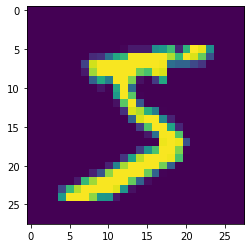

Guessed number: 5


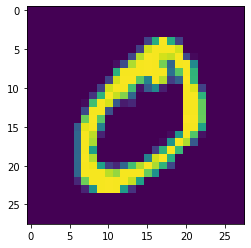

Guessed number: 0


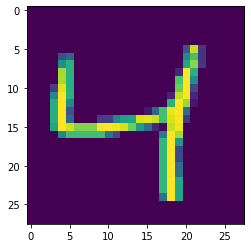

Guessed number: 4


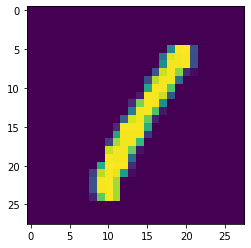

Guessed number: 1


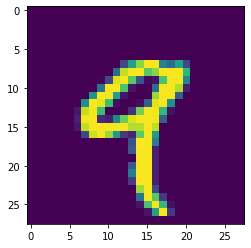

Guessed number: 9


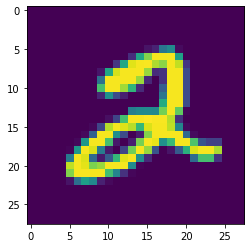

Guessed number: 2


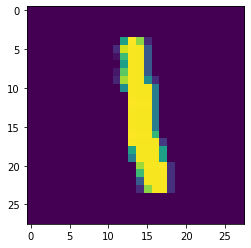

Guessed number: 1


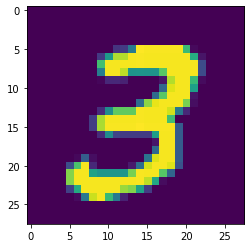

Guessed number: 3


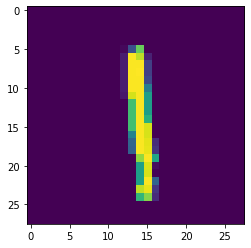

Guessed number: 1


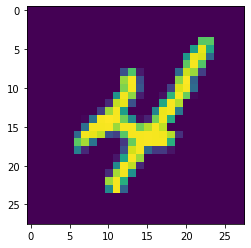

Guessed number: 4


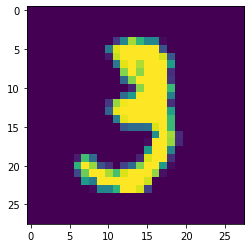

Guessed number: 3


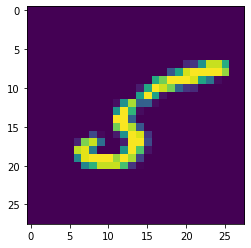

Guessed number: 5


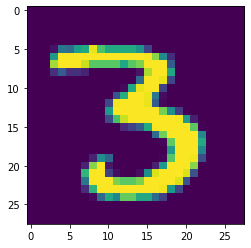

Guessed number: 3


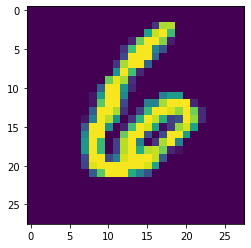

Guessed number: 6


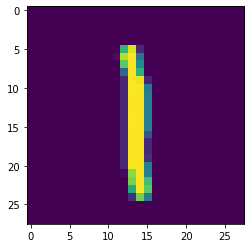

Guessed number: 1


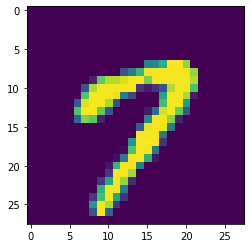

Guessed number: 7


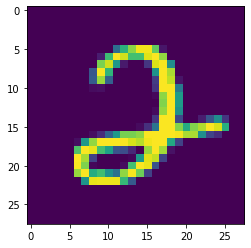

Guessed number: 2


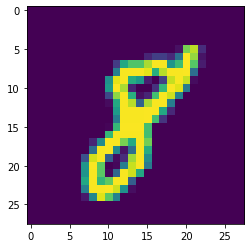

Guessed number: 8


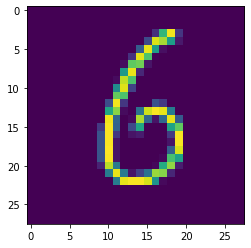

Guessed number: 6


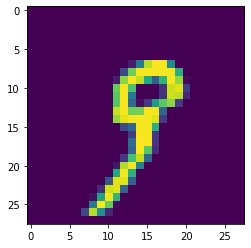

Guessed number: 9


In [38]:
#reference for what the drawn numbers should look like
for x_train_i in range(20):
    plt.imshow(x_train[x_train_i])
    plt.show()
    pred = model(x_train[[x_train_i]], training=False)
    print('Guessed number: {}'.format(np.argmax(pred[0])))

In [39]:
from PIL import ImageGrab

#use to check path
print(os.getcwd() + '\images\hand_drawn.png')
import pathlib
drawn_image_path = pathlib.Path(os.getcwd() + r'\images\hand_drawn\user_drawing.png')

def screenshot(widget):
    x=root.winfo_rootx()+widget.winfo_x()
    y=root.winfo_rooty()+widget.winfo_y()
    x1=x+widget.winfo_width()
    y1=y+widget.winfo_height()
    ImageGrab.grab((x,y,x1,y1)).resize((28,28)).save(drawn_image_path, format='PNG')
    

C:\Users\junha\Documents\python_things\python_2021\number_reader\images\hand_drawn.png


In [144]:
from tkinter import *
from tkinter import ttk

class Sketchpad(Canvas):
    def __init__(self, parent, **kwargs):
        super().__init__(parent, **kwargs)
        self.bind("<Button-1>", self.add_oval)
        self.bind("<B1-Motion>", self.add_oval)

    def add_oval(self, event):
        radius = 15
        self.create_oval(event.x-radius, event.y+radius, event.x+radius, event.y-radius, fill='black')

    def clear(self):
        self.delete('all')

root = Tk()
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

mainframe = ttk.Frame(root, width=1000, height=500)
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))

sketch = Sketchpad(mainframe, width=500, height=500, bg='white', highlightthickness=0)
sketch.grid(column=0, row=0, sticky='W')

button_frame = ttk.Frame(mainframe, width=200, height=500, borderwidth=5, relief='raised')
button_frame.grid(column=1, row=0, sticky='E')
button_frame.grid_propagate(False)
clear_button = ttk.Button(button_frame, text='Clear Drawing', command=sketch.clear)
clear_button.grid(column=1, row=0, padx=20, pady=20)
submit_button = ttk.Button(button_frame, text='Submit', command=lambda: screenshot(sketch))
submit_button.grid(column=1, row=1, padx=20, pady=20)

root.mainloop()

In [41]:
# import PIL
# drawn_image = PIL.Image.open(drawn_image_path) 
# drawn_image.show()
# print(drawn_image)
# im.show()

Guessed number is 1 with 99.99816417694092% confidence


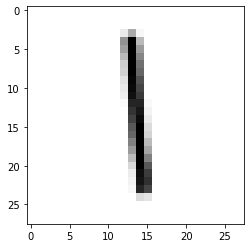

In [143]:
import PIL

drawn_image = tf.keras.utils.load_img(
    drawn_image_path, target_size=(28, 28), color_mode='grayscale')
drawn_image = PIL.ImageOps.invert(drawn_image)
drawn_image = np.array(drawn_image) / 255.0

drawn_img_array = tf.keras.utils.img_to_array(drawn_image)
drawn_img_array = tf.expand_dims(drawn_img_array, 0)

predictions = model(drawn_img_array, training=False)
print('Guessed number is {} with {}% confidence'.format(np.argmax(predictions[0]), max(tf.nn.softmax(predictions).numpy()[0])*100))
# print(tf.nn.softmax(predictions).numpy())

plt.imshow(drawn_image, cmap=plt.cm.binary)
plt.show()